<a href="https://colab.research.google.com/github/MoronSlayer/Stock-Prediction-with-regression-in-scikit/blob/master/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np ## for calculations on data
import csv
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [0]:
df = pd.read_csv('onemonthdata.csv') # creating a dataframe to read a CSV file
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-05,2818.090088,2827.280029,2800.919922,2826.149902,2826.149902,3548830000
1,2019-06-06,2828.510010,2852.100098,2822.449951,2843.489990,2843.489990,3396410000
2,2019-06-07,2852.870117,2884.969971,2852.870117,2873.340088,2873.340088,3220250000
3,2019-06-10,2885.830078,2904.770020,2885.510010,2886.729980,2886.729980,3209210000
4,2019-06-11,2903.270020,2910.610107,2878.530029,2885.719971,2885.719971,3548420000


In [0]:
#Create the lists / X and y data set
dates = []
prices = []

In [0]:
df.shape ## to show the number of rows and column

(65, 7)

In [0]:
df.tail(1) ## data we will be testing on

,Date,Open,High,Low,Close,Adj Close,Volume
64,2019-09-05,2960.600098,2985.860107,2960.600098,2976.0,2976.0,1985626103


In [0]:
#Get all of the data except for the last row -> basically creating another dataset to work with and the predict for the last date
df = df.head(len(df)-1)
print(df.shape)

(64, 7)


In [0]:
df_dates = df.loc[:,'Date'] ## the date column of the dataset is stored into a variabe df_dates
df_open = df.loc[:,'Open'] ## the open column of the dataset is stored into a variabe df_open

You can compare the values using any other column from the data , here we used date and open 

In [0]:
#Create the independent data set 'X' as dates

for date in df_dates:
    
    dates.append( [int(date.split('-')[2])] ) ## the .split helps us take only the date and remvoes the month and year

    
# Create the dependent data set 'y' as prices

for open_price in df_open: 
    prices.append(float(open_price))

In [0]:
print (dates) ## the days recorded in the data set 

[[5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [1], [2], [3], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4]]


In [0]:
#Function to make predictions 
def predict_prices(dates, prices, x): 
    
    #Create the 3 Support Vector Regression models
    svr_lin = SVR(kernel='linear', C= 1e3)
    svr_poly= SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    
    #Train the SVR models 
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    #Create the Linear Regression model and train it using fitting 
    lin_reg = LinearRegression()
    lin_reg.fit(dates,prices)
    
    ## Creating a ridge regression model 
    rr = Ridge(alpha=0.01)
    rr.fit(dates,prices)
    
    ## Creating a lasso model 
    lasso = Lasso()
    lasso.fit(dates,prices)
    
    #Plot the models on a graph to see which has the best fit
     
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
    plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
    plt.plot(dates, rr.predict(dates), color='magenta', label='Ridge Reg')
    plt.plot(dates, lasso.predict(dates), color='cyan', label='Lasso Reg')
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend().draggable
    plt.show()
    print ('the svr_rbf predicted value is', svr_rbf.predict(x)[0])
    print ('the svr_lin predicted value is ',svr_lin.predict(x)[0])
    print ('the svr_poly predicted value is ',svr_poly.predict(x)[0])
    print ('the lin_reg predicted value is ',lin_reg.predict(x)[0])
    print ('the ridge_reg predicted value is ',rr.predict(x)[0])
    print ('the lasso_reg predicted value is ',lasso.predict(x)[0])


    
        


here we used three kinds of regression , trained them in the df we edited to remove out the last row and then we are going to predict the 'open' using these different types of regression


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


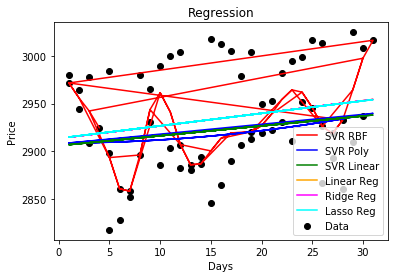

the svr_rbf predicted values is 2893.6026226076137
the svr_lin predicted values is  2911.175200960982
the svr_poly predicted values is  2909.6254659194487
the lin_reg predicted values is  2920.130630677789
the ridge_reg predicted values is  2920.130660371175
the lasso_reg predicted values is  2920.275153409688
None


In [0]:
predicted_price = predict_prices(dates, prices, [[5]]) ## 5 is the date we saw in the df.tail() 
print(predicted_price)

as we can see from the predicted values , the value of the open on 5th is 2960.600098 and the closest we get for this dataset is using the lasso regression model 